# Week 1

Imports

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import operator

Execute a configurable number of runs of the bandit-problem in Exercise 2.5

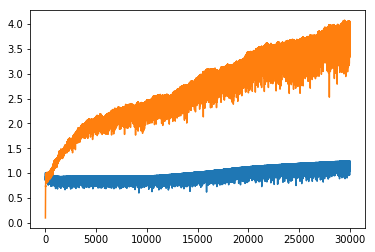

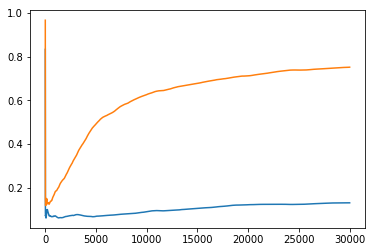

In [80]:
def run(k = 10, mean = 0, std = 0.01, step_size = 0.1, epsilon = 0.1, steps = 10000, constant = True):

    def rnd():
        return np.random.normal(mean, std, 1)
    
    def update_q():
        for j in range(k):
            q[j] = q[j] + rnd()
    
    def optimal_action():
        return max(enumerate(q), key=operator.itemgetter(1))[0]
    
    def estimate_optimal_action():
        return max(enumerate(Q), key=operator.itemgetter(1))[0]
    
    def action():
        if np.random.sample() < epsilon:
            return np.random.randint(k)
        return estimate_optimal_action()
    
    def update(i, n):
        if constant:
            Q[i] = float(Q[i] + step_size * (q[i] + rnd() - Q[i]))
        else:
            Q[i] = float(Q[i] + (1/n) * (q[i] + rnd() - Q[i]))
        q_list.append(Q[i])
        return n+1
    
    q = [1] * k
    Q = [0] * k
    q_list, a_list = [], []
    a, n = 0, 1

    for step in range(steps):
        An = action()
        a += 1 if An == optimal_action() else 0
        a_list.append(a/n)
        n = update(An, n)
        update_q()
    
    return np.array(q_list), np.array(a_list)

def bandit(runs = 30, steps = 30000):
    
    def avg_run(constant = True):
        avg = np.zeros(steps)
        act = np.zeros(steps)
        for i in range(runs):
            q_list, a_list = run(steps=steps, constant=constant)
            avg += q_list
            act += a_list
        return avg / runs, act / runs

    x = range(steps)
    
    reward_avg, actions_avg = avg_run(constant=False)
    reward_const, actions_const = avg_run()
    
    plt.plot(x, reward_avg,
             x, reward_const)
    plt.show()
    
    plt.plot(x, actions_avg,
             x, actions_const)
    
bandit()